# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БВТ2004 Станолевич Владислав
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

In [64]:
!pip3 install pyvis
import pandas as pd
import networkx as nx

import math
import copy
import random
import time
import matplotlib.pyplot as plt

In [65]:
#Генерация графа в виде матрицы смежности
def generate_matrix():
    size = random.randint(30, 100)
    matrix = [[math.inf for i in range(size)] for j in range(size)]
    for i in range(size):
        for j in range(size):
            if random.randint(0, 3) == 3 and i != j:
                rand_count = random.randint(1, 20)
                matrix[i][j] = rand_count
    return matrix

#Графическое отображение графа
def draw_graph(graph, path = None):
    colors = None
    if path:
        colors = []
        for item in graph.edges():
            try:
                index1 = path.index(item[0])
                index2 = path.index(item[1])
                if index1 + 1 != index2 and index1 - 1 != index2:
                    raise
                colors.append('blue')
            except:
                colors.append('black')
    fig = plt.figure(1, figsize=(10, 10), dpi=60)
    pos = nx.spectral_layout(graph)
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_nodes(graph, node_color = 'green', node_size = 200, pos = pos)
    nx.draw_networkx_edges(graph,edge_color = colors, pos = pos, arrowstyle = 'simple, tail_width = 0.05')
    nx.draw_networkx_labels(graph, pos = pos)
    nx.draw_networkx_edge_labels(graph, pos = pos, edge_labels = labels)
    
    
#Создание графа, используя матрицу смежности
def create_graph(matrix : list) -> nx.DiGraph:
    graph = nx.DiGraph()
    for i in range(1, len(matrix)):
        graph.add_node(i)
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] != math.inf and i != j:
                graph.add_edge(i + 1, j + 1, weight=matrix[i][j], label=matrix[i][j])
    return graph

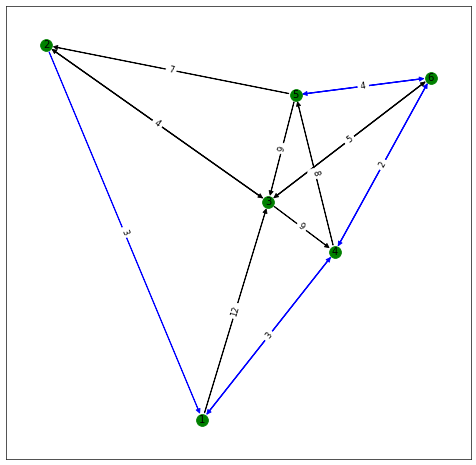

In [66]:
#АЛГОРИТМ ФЛОЙДА-УОРШЕЛЛА

#Загрузка матрицы из файла
with open("mat2.txt", "r", encoding = "utf-8") as file:
    matrix = [[int(num) for num in line.split(" ")] for line in file]
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 0:
                matrix[i][j] = math.inf
                
#Создаём граф
graph = create_graph(matrix)

#Получение пути
def get_path(H, v, u):
    v -= 1
    u -= 1
    result = []
    result.append(v)
    while v != u:
        v = H[v][u]
        result.append(v)
    __result = [el + 1 for el in result]
    return __result


#Алгоритм
def floyd(matrix):
    W = copy.deepcopy(matrix)
    N = len(W)
    H = [[0 for i in range(N)] for j in range(N)]
    for i in range(len(W)):
        for j in range(len(W)):
            if W[i][j] != math.inf:
                H[i][j] = j
    for i in range(len(W)):
        for j in range(len(W)):
            if i == j: continue
            if W[i][j] != math.inf:
                for k in range(len(W)):
                    if i == k or j == k: continue
                    if W[i][k] > W[i][j] + W[j][k]:
                        W[i][k] = W[i][j] + W[j][k]
                        H[i][k] = H[i][j]
    return (W, H)


result = floyd(matrix)
path = get_path(result[1], 2, 5)


#Графические изменения
graph1 = copy.deepcopy(graph)
for i in range(1, len(path)):
    graph1.nodes[path[i - 1]]['color'] = 'red'
    graph1.edges[path[i - 1], path[i]]['color'] = 'red'
graph1.nodes[path[-1]]['color'] = 'red'

draw_graph(graph, path)

In [67]:
#Определение скорости работы алгоритма

tests = []

for i in range(5):
    temp_matrix = generate_matrix()
    node_counts = len(temp_matrix)
    edge_counts = 0
    for i in range(len(temp_matrix)):
        for j in range(len(temp_matrix)):
            if temp_matrix[i][j] != math.inf:
                edge_counts += 1
    t1 = time.time()
    result = floyd(temp_matrix)
    t2 = time.time()
    delta = round((t2 - t1) * 1000)
    tests.append([node_counts, edge_counts, delta])

pd.DataFrame(tests, columns = ["Количество узлов", "Количество ребер", "Время в мс"])

,Количество узлов,Количество ребер,Время в мс
0,64,1032,60
1,47,526,22
2,70,1209,76
3,72,1262,78
4,83,1697,156


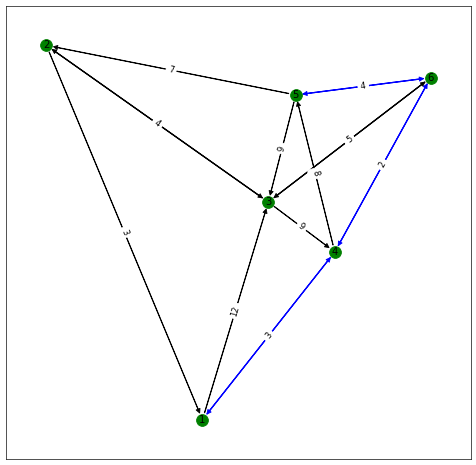

In [68]:
#АЛГОРИТМ ДЕЙKСТРЫ

#Загрузка матрицы из файла
with open("mat2.txt", "r", encoding = "utf-8") as file:
    matrix = [[int(num) for num in line.split(" ")] for line in file]
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 0:
                matrix[i][j] = math.inf
                
#Создаём граф
graph = create_graph(matrix)

#Алгоритм
def dijkstra(__matrix, v, u):
    matrix = copy.deepcopy(__matrix)
    v -= 1
    u -= 1
    N = len(matrix)
    D = [matrix[v][i] for i in range(N)]
    D[v] = 0
    P = [[v] for i in range(N)]
    checked_nodes = {v}
    for i in range(N):
        temp_min = math.inf
        node = None
        for j in range(N):
            if D[j] < temp_min and j not in checked_nodes:
                temp_min = D[j]
                node = j
        if node is not None:
            checked_nodes.add(node)
            for k in range(N):
                if D[k] > matrix[node][k] + D[node]:
                    D[k] = matrix[node][k] + D[node]
                    P[k] = copy.deepcopy(P[node])
                    P[k].append(node)
        else:
            break
                    
    for i in range(N):
        if D[i] != math.inf and P[i][0] != i:
            P[i].append(i)
    
    if D[u] == math.inf:
        path = []
    else:
        path = [el + 1 for el in P[u]]
    return (D, path, P)



result = dijkstra(matrix, 1, 5)
path = result[1]

#Графические изменения
graph1 = copy.deepcopy(graph)
if len(path) > 0:
    for i in range(1, len(path)):
        graph1.nodes[path[i - 1]]['color'] = 'red'
        graph1.edges[path[i - 1], path[i]]['color'] = 'red'
    graph1.nodes[path[-1]]['color'] = 'red'

draw_graph(graph1, path)

In [69]:
#Определение скорости работы алгоритма

tests = []

for i in range(5):
    temp_matrix = generate_matrix()
    node_counts = len(temp_matrix)
    edge_counts = 0
    for i in range(len(temp_matrix)):
        for j in range(len(temp_matrix)):
            if temp_matrix[i][j] != math.inf:
                edge_counts += 1
    t1 = time.time()
    c1 = random.randint(1, len(temp_matrix) // 2)
    c2 = random.randint(1, len(temp_matrix))
    result = dijkstra(temp_matrix, c1, c2)
    t2 = time.time()
    delta = round((t2 - t1) * 1000)
    tests.append([node_counts, edge_counts, delta])

pd.DataFrame(tests, columns = ["Количество узлов", "Количество ребер", "Время в мс"])

,Количество узлов,Количество ребер,Время в мс
0,34,300,1
1,67,1155,4
2,68,1124,4
3,64,1035,3
4,74,1368,5


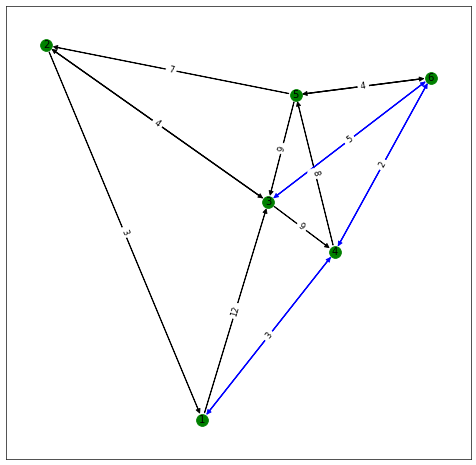

In [70]:
#АЛГОРИТМ БЕЛЛА-ФОРДА

#Загрузка матрицы из файла
with open("mat2.txt", "r", encoding = "utf-8") as file:
    matrix = [[int(num) for num in line.split(" ")] for line in file]
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 0:
                matrix[i][j] = math.inf
                
#Создаём граф
graph = create_graph(matrix)

#Алгоритм
def bell_ford(matrix, v, u):
    v -= 1
    u -= 1
    N = len(matrix)
    cycle = False
    A = [[math.inf for i in range(N)] for j in range(N)]
    P = [[v] for i in range(N)]
    A[0][v] = 0
    for k in range(1, N):
        A[k] = copy.deepcopy(A[k - 1])
        for i in range(N):
            for j in range(N):
                if matrix[i][j] == math.inf:
                    continue
                if A[k][j] > A[k - 1][i] + matrix[i][j]:
                    A[k][j] = A[k - 1][i] + matrix[i][j]
                    P[j] = copy.deepcopy(P[i])
                    P[j].append(j)
    if A[-1] != A[-2]:
        cycle = True
    if A[-1][u] == math.inf or len(P[u]) == 1:
        path = []
    else:
        path = [el + 1 for el in P[u]]
    return (A[-1], path, P, cycle)

result = bell_ford(matrix, 1, 3)
path = result[1]

#Графические изменения
graph1 = copy.deepcopy(graph)
if len(path) > 0:
    for i in range(1, len(path)):
        graph1.nodes[path[i - 1]]['color'] = 'red'
        graph1.edges[path[i - 1], path[i]]['color'] = 'red'
    graph1.nodes[path[-1]]['color'] = 'red'

draw_graph(graph1, path)

In [71]:
#Определение скорости работы алгоритма

tests = []

for i in range(5):
    temp_matrix = generate_matrix()
    node_counts = len(temp_matrix)
    edge_counts = 0
    for i in range(len(temp_matrix)):
        for j in range(i):
            if temp_matrix[j][i] != 0:
                edge_counts += 1
    t1 = time.time()
    c1 = random.randint(1, len(temp_matrix) // 2)
    c2 = random.randint(1, len(temp_matrix))
    result = bell_ford(temp_matrix, c1, c2)
    t2 = time.time()
    delta = round((t2 - t1) * 1000)
    tests.append([node_counts, edge_counts, delta])

pd.DataFrame(tests, columns = ["Количество узлов", "Количество ребер", "Время в мс"])

,Количество узлов,Количество ребер,Время в мс
0,95,4465,144
1,81,3240,94
2,32,496,0
3,48,1128,31
4,98,4753,203


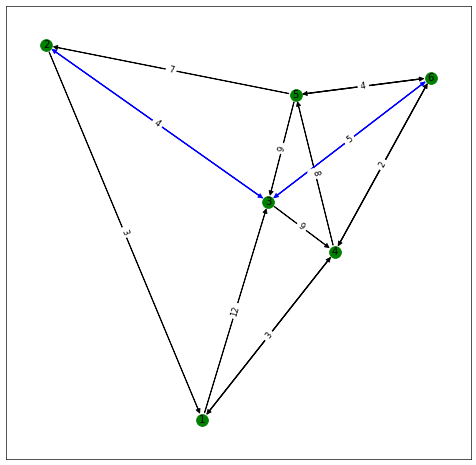

In [72]:
#АЛГОРИТМ ДЖОНСОНА

#Загрузка матрицы из файла
with open("mat2.txt", "r", encoding = "utf-8") as file:
    matrix = [[int(num) for num in line.split(" ")] for line in file]
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 0:
                matrix[i][j] = math.inf
                
#Создаём граф
graph = create_graph(matrix)

#Алгоритм
def johnson(__matrix, v, u):
    v -= 1
    u -= 1
    w = copy.deepcopy(__matrix)
    matrix = copy.deepcopy(__matrix)
    N = len(matrix)
    for i in range(N):
        w[i].append(math.inf)
    w.append([0 for i in range(N + 1)])
    temp_result = bell_ford(w, N + 1, 1)
    if temp_result[3] == True:
        return ([], [], [])
    for i in range(N):
        for j in range(N):
            if matrix[i][j] != math.inf and temp_result[0][i] != math.inf and temp_result[0][j] != math.inf:
                matrix[i][j] += temp_result[0][i] - temp_result[0][j]
    distArr = []
    pathArr = []
    for i in range(N):
        dijkstra_result = dijkstra(matrix, i + 1, i + 1)
        distArr.append(dijkstra_result[0])
        pathArr.append(dijkstra_result[2])
    for i in range(N):
        for j in range(N):
            if distArr[i][j] != math.inf and temp_result[0][i] != math.inf and temp_result[0][j] != math.inf:
                distArr[i][j] += temp_result[0][j] - temp_result[0][i]
    
    return (distArr, [el + 1 for el in pathArr[v][u]], pathArr)


result = johnson(matrix, 6, 2)
path = result[1]

#Графические изменения
graph1 = copy.deepcopy(graph)
if len(path) > 0:
    for i in range(1, len(path)):
        graph1.nodes[path[i - 1]]['color'] = 'red'
        graph1.edges[path[i - 1], path[i]]['color'] = 'red'
    graph1.nodes[path[-1]]['color'] = 'red'

draw_graph(graph1, path)

In [73]:
#Определение скорости работы алгоритма

tests = []

for i in range(5):
    temp_matrix = generate_matrix()
    node_counts = len(temp_matrix)
    edge_counts = 0
    for i in range(len(temp_matrix)):
        for j in range(i):
            if temp_matrix[j][i] != 0:
                edge_counts += 1
    t1 = time.time()
    c1 = random.randint(1, len(temp_matrix) // 2)
    c2 = random.randint(1, len(temp_matrix))
    result = johnson(temp_matrix, c1, c2)
    t2 = time.time()
    delta = round((t2 - t1) * 1000)
    tests.append([node_counts, edge_counts, delta])

pd.DataFrame(tests, columns = ["Количество узлов", "Количество ребер", "Время в мс"])

,Количество узлов,Количество ребер,Время в мс
0,77,2926,583
1,85,3570,693
2,98,4753,1066
3,46,1035,109
4,84,3486,738


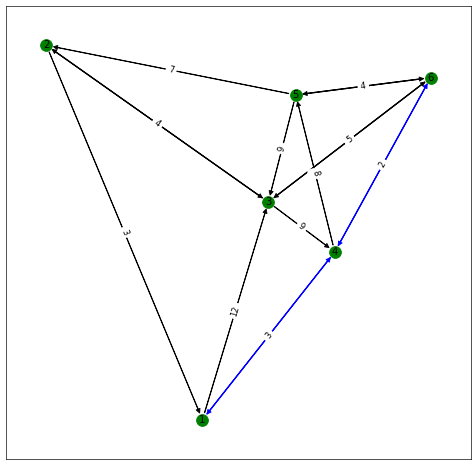

In [74]:
#АЛГОРИТМ ЛЕВИТА

#Загрузка матрицы из файла
with open("mat2.txt", "r", encoding = "utf-8") as file:
    matrix = [[int(num) for num in line.split(" ")] for line in file]
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 0:
                matrix[i][j] = math.inf
                
#Создаём граф
graph = create_graph(matrix)

#Алгоритм
def levit(__matrix, v, u):
    v -= 1
    u -= 1
    matrix = copy.deepcopy(__matrix)
    N = len(matrix)
    paths = [[v] for i in range(N)]
    distance = [math.inf for i in range(N)]
    distance[v] = 0
    m0 = set()
    m1 = {"main_queue" : [v], "urgent_queue": []}
    m2 = set(range(N))
    m2.remove(v)
    while len(m1["main_queue"]) or len(m1["urgent_queue"]):
        if len(m1["urgent_queue"]):
            cur_node = m1["urgent_queue"].pop(0)
        else:
            cur_node = m1["main_queue"].pop(0)
        for temp_node in range(N):
            if distance[temp_node] == math.inf and matrix[cur_node][temp_node] == math.inf:
                continue
            if temp_node in m2:
                m2.remove(temp_node)
                calculated_distance = distance[cur_node] + matrix[cur_node][temp_node]
                if calculated_distance < distance[temp_node]:
                    distance[temp_node] = calculated_distance
                    paths[temp_node] = copy.deepcopy(paths[cur_node])
                    paths[temp_node].append(temp_node)
                m1["main_queue"].append(temp_node)
            elif temp_node in m1["main_queue"] or temp_node in m1["urgent_queue"]:
                calculated_distance = distance[cur_node] + matrix[cur_node][temp_node]
                if calculated_distance < distance[temp_node]:
                    distance[temp_node] = calculated_distance
                    paths[temp_node] = copy.deepcopy(paths[cur_node])
                    paths[temp_node].append(temp_node)
            elif temp_node in m0 and distance[temp_node] > distance[cur_node] + matrix[cur_node][temp_node]:
                m0.remove(temp_node)
                m1["urgent_queue"].append(temp_node)
                calculated_distance = distance[cur_node] + matrix[cur_node][temp_node]
                if calculated_distance < distance[temp_node]:
                    distance[temp_node] = calculated_distance
                    paths[temp_node] = copy.deepcopy(paths[cur_node])
                    paths[temp_node].append(temp_node)
        m0.add(cur_node)
    return distance, [el + 1 for el in paths[u]], paths
result = levit(matrix, 1, 6)
path = result[1]

#Графические изменения
graph1 = copy.deepcopy(graph)
if len(path) > 0:
    for i in range(1, len(path)):
        graph1.nodes[path[i - 1]]['color'] = 'red'
        graph1.edges[path[i - 1], path[i]]['color'] = 'red'
    graph1.nodes[path[-1]]['color'] = 'red'

draw_graph(graph1, path)

In [75]:
#Определение скорости работы алгоритма

tests = []

for i in range(5):
    temp_matrix = generate_matrix()
    node_counts = len(temp_matrix)
    edge_counts = 0
    for i in range(len(temp_matrix)):
        for j in range(i):
            if temp_matrix[j][i] != 0:
                edge_counts += 1
    t1 = time.time()
    c1 = random.randint(1, len(temp_matrix) // 2)
    c2 = random.randint(1, len(temp_matrix))
    result = levit(temp_matrix, c1, c2)
    t2 = time.time()
    delta = round((t2 - t1) * 1000)
    tests.append([node_counts, edge_counts, delta])

pd.DataFrame(tests, columns = ["Количество узлов", "Количество ребер", "Время в мс"])

,Количество узлов,Количество ребер,Время в мс
0,99,4851,26
1,44,946,3
2,44,946,3
3,96,4560,20
4,69,2346,7


Номер пути 1


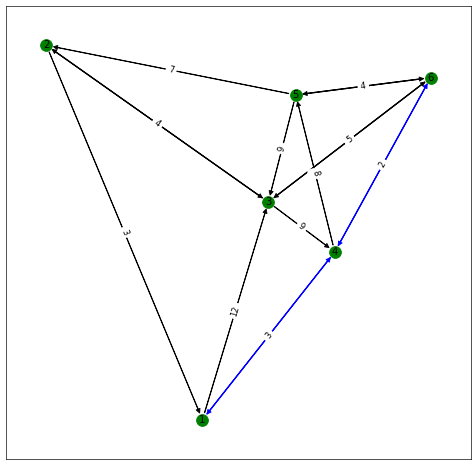

Номер пути 2


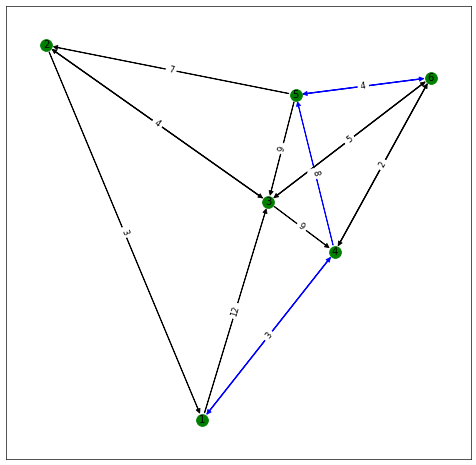

Номер пути 3


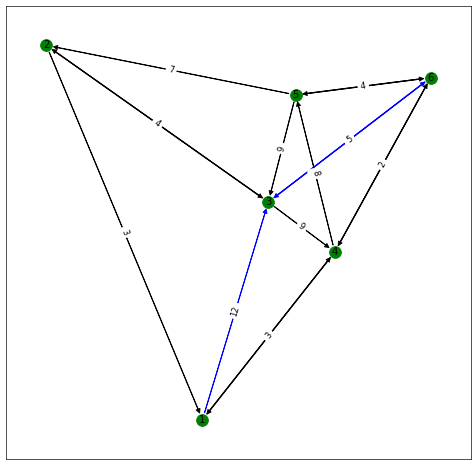

Номер пути 4


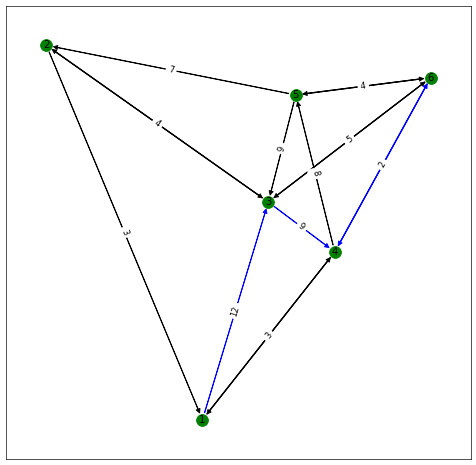

Номер пути 5


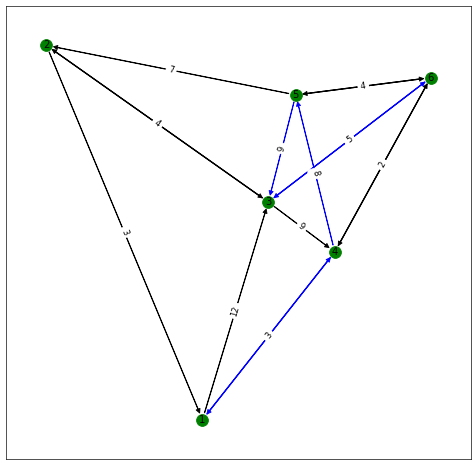

In [76]:
#АЛГОРИТМ ЙЕНА

#Загрузка матрицы из файла
with open("mat2.txt", "r", encoding = "utf-8") as file:
    matrix = [[int(num) for num in line.split(" ")] for line in file]
    for i in range(len(matrix)):
        for j in range(len(matrix)):
            if matrix[i][j] == 0:
                matrix[i][j] = math.inf
#Создаём граф
graph = create_graph(matrix)

#Алгоритм
def yen(__matrix, v, u, K):
    v -= 1
    u -= 1
    matrix = copy.deepcopy(__matrix)
    N = len(matrix)
    temp = dijkstra(matrix, v + 1, u + 1)
    candidates = set()
    paths = [[el - 1 for el in temp[1]]]
    lengths = [temp[0][u]]
    if len(paths[0]) < 2:
        return ([], [])
    for k in range (1, K):
        cur_mat = copy.deepcopy(matrix)
        for i in range(len(paths[-1]) - 1):
            spur_node = paths[-1][i]
            root_path = paths[-1][:i + 1]
            
            for path in paths:
                if root_path == path[:i + 1]:
                    cur_mat[path[i]][path[i + 1]] = math.inf
            
            for node in root_path:
                if node != spur_node:
                    cur_mat[node] = [math.inf for j in range(N)]
            
            temp = dijkstra(cur_mat, spur_node + 1, u + 1)
            spur_path = [el - 1 for el in temp[1][1:]]
            if len(spur_path) < 1:
                continue
            
            total_path = root_path
            total_path.extend(spur_path)
            total_path = tuple(total_path)
            distance = 0
            for j in range(1, len(total_path)):
                distance += matrix[total_path[j - 1]][total_path[j]]

            candidates.add((total_path, distance))
        if len(candidates) == 0:
            break
            
        sorted_candidates = list(candidates)
        sorted_candidates.sort(key = lambda x : x[1])
        paths.append(list(sorted_candidates[0][0]))
        lengths.append(sorted_candidates[0][1])
        candidates.remove(sorted_candidates[0])
    for i in range(len(paths)):
        paths[i] = [el + 1 for el in paths[i]]
    return (paths, lengths)

result = yen(matrix, 1, 6, 5)
paths = result[0]

#Графические изменения
for i in range(len(paths)):
    graph1 = copy.deepcopy(graph)
    path = paths[i]
    for j in range(1, len(path)):
        graph1.nodes[path[j - 1]]['color'] = 'red'
        graph1.edges[path[j - 1], path[j]]['color'] = 'red'
    graph1.nodes[path[-1]]['color'] = 'red'
    
    draw_graph(graph1, paths[i])
    print(f"Номер пути {i + 1}")
    plt.show()

In [77]:
#Тестовый блок для определения скорости работы алгоритма

tests = []

for i in range(5):
    temp_matrix = generate_matrix()
    node_counts = len(temp_matrix)
    edge_counts = 0
    for i in range(len(temp_matrix)):
        for j in range(i):
            if temp_matrix[j][i] != 0:
                edge_counts += 1
    t1 = time.time()
    c1 = random.randint(1, len(temp_matrix) // 2)
    c2 = random.randint(1, len(temp_matrix))
    c3 = random.randint(3, 10)
    result = yen(temp_matrix, c1, c2, c3)
    t2 = time.time()
    delta = round((t2 - t1) * 1000)
    tests.append([node_counts, edge_counts, c3, delta])

pd.DataFrame(tests, columns = ["Количество узлов", "Количество ребер", "Кол-во маршрутов", "Время в мс"])

,Количество узлов,Количество ребер,Кол-во маршрутов,Время в мс
0,71,2485,4,59
1,30,435,3,0
2,88,3828,3,69
3,70,2415,4,46
4,87,3741,4,72


### Вывод

Графы помогают визуально отобразить отношения на множествах, представить сложные взаимодействия - аэропорты и рейсы, отделы компаний и тд. Графом называется система объектов произвольной природы (вершин) и связок (ребер), соединяющих некоторые пары этих объектов. Граф - нелинейная структура данных. Если порядок двух концов ребра неважен, данный граф называют неориентированным. Если направление ребра имеет значение - ориентированным. 
Каждый из данных алгоритмов помогает найти кратчайшее расстояние между различными вершинами графа. Наиболее простым и универсальным можно считать алгоритм Беллмана-Форда, так как он позволяет работать с графами имеющими отрицательные дуги, однако данный граф не отличается скоростью и производительностью. Наиболее быстрым у меня получился алгоритм Левита, однако он больше подходит для графов "геометрической" и прямоугольной формы. Самым лёгким для реализации можно считать алгоритм Флойда-Уоршелла, так как он постепенно находит самый короткий путь относительно базового путём перебора. Второе место занимают алгоритмы Дейкстры и Беллмана-Форда, так как они тоже находят самый короткий путь перебором, но снизу вверх, постепенно проходя весь граф, что отрицательно сказывается на скорости.